# Final Project: Analysis of Two Museum Datasets

Name(NetID): Jenna Kim(jkim682) | Yingying Han(yh17) | Xinyu Huang(xinyuh10) 



## Data

We used three different datasets:

1) Two meseum datasets: Metropolitan & Indianapolis  
2) World Bank dataset:  
3) Ethnicity dataset:


## Data Preprocessing

1) We integrated two meseum datasets  
2) We merged two World bank datasets   
3) We merged two ethnicity datasets

## Load Data

### Yingying & Xinyu, you can work on the following processed datasets
#### Note: I integrated three .py scripts we had created for collecting data. Please see "museum_data.py" file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

file1 = "museum.csv"
file2 = "world_bank.csv"
file3 = "ethnicity.csv"
    
museum_df = pd.read_csv(file1, index_col=False, low_memory=False)
population_df = pd.read_csv(file2, index_col=False, low_memory=False)
ethnicity_df = pd.read_csv(file3, index_col=False, low_memory=False)

In [3]:
museum_df.tail()
museum_df.shape   # (485632, 15)

# population_df.head()
population_df.shape   # (263, 5)

# ethnicity_df.head()
ethnicity_df.shape   # (133, 3)

(133, 3)

## Analysis 1 : Distribution of artifacts by geographical information

### Within USA (By States)

In [4]:
museum_df_us = museum_df[museum_df['Country 1']=='United States']
museum_df_us.loc[:,'State 1'] = museum_df_us['State 1'].fillna('N/A')

C:\Users\icyda\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False).head(10)

State 1
N/A                 17784
Indiana               840
New York               80
California             72
New Mexico             59
Queens                 49
Pennsylvania           44
Massachusetts          43
Brooklyn               35
Lancaster County       33
dtype: int64

We exclude the objects from Indinan, because the museum is located in Indiana

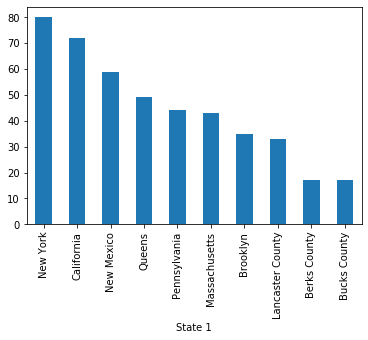

In [6]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False)[2:].head(10).plot.bar()

### Origin of Nations 

In [7]:
def calculate_correlation(data, column1, column2):
    pearson = data[[column1, column2]].corr('pearson')
    spearman = data[[column1, column2]].corr('spearman')
    kendall = data[[column1, column2]].corr('kendall')
    
    return {'pearson': pearson, 'spearman': spearman, 'kendall': kendall}

def merge_count_with_population(count_data, population_data):
    merged_df = pd.merge(count_data, population_data, how='left', left_index=True, right_on='CountryName')
    merged_df = merged_df[['CountryName','Count', 'Population']]
    merged_df.reset_index(drop=True, inplace=True)
    for index,row in merged_df.iterrows():  # fillin the unmatched countries
        if pd.isnull(row['Population']):
            name = row['CountryName']
            if name != "N/A":
                full_name = population_df[population_df['CountryName'].str.contains(name)]
                population = population_df[population_df['CountryName'].str.contains(name)]
                merged_df.loc[index,['CountryName']] = full_name['CountryName'].iloc[0]
                merged_df.loc[index,['Population']]= population['Population'].iloc[0]
    return merged_df

In [8]:
museum_df.loc[:,'Country 1'] = museum_df['Country 1'].fillna('N/A')
museum_df[museum_df['Country 1'] == "Côte d'Ivoire"] ="Cote d'Ivoire"
museum_group = museum_df.groupby("Country 1").size().sort_values(ascending=False).head(30).to_frame(name='Count')
museum_group

,Count
Country 1,
N/A,400557
Egypt,33324
United States,19298
Iran,6697
Peru,3431
France,2186
Mexico,1568
United Kingdom,1471
Indonesia,1441


In [9]:
museum_population = merge_count_with_population(museum_group, population_df)

Let's calculate the correlation (excluding the N/A value)

In [10]:
museum_population = museum_population[1:]
calculate_correlation(museum_population, 'Count', 'Population')['spearman']

,Count,Population
Count,1.000000,0.599507
Population,0.599507,1.000000


Maybe some relationship between the count of the objects from a certain culture and the population of that culture

In [11]:
df = pd.merge(museum_population, ethnicity_df, how='left', left_on='CountryName', right_on='Country')
df = df[df['Country'].notnull()]
calculate_correlation(df, 'Count', 'Population_y')

{'pearson':                  Count  Population_y
 Count         1.000000      0.384927
 Population_y  0.384927      1.000000,
 'spearman':                  Count  Population_y
 Count         1.000000      0.216667
 Population_y  0.216667      1.000000,
 'kendall':                  Count  Population_y
 Count         1.000000      0.111111
 Population_y  0.111111      1.000000}

No apparent relationship between the count of the objects from a certain culture and the population of that culture ethnic group in U.S

We have to say the analysis is not percise, because the large number of N/As in both Country and Ethnicity colunms.

## Analysis 2: Distribution of artifacts by time

# Basic year inspection before analysis:


## (1) How many rows in all in thie file? 

486732

## (2) How many rows do not have year value (nan)?

2390

## (3) How many unique year values are there (exclude nan value)?
2044

## (4) What is the year range?
from year 400000 BC to 2020 AD.

In [16]:
object_year_df = pd.read_csv ("museum.csv" ,usecols = ["ObjectID","ObjectBeginDate"])

In [17]:
object_year_df.shape

(485632, 2)

In [18]:
# How many cells do not have year information?
object_year_df["ObjectBeginDate"].isnull().sum()

2390

In [19]:
object_year_df = object_year_df.dropna(subset = ["ObjectBeginDate"]).astype(np.int64)

In [20]:
object_year_df.shape

(483242, 2)

In [21]:
object_year_df["ObjectBeginDate"].unique()
len(object_year_df["ObjectBeginDate"].unique())

2044

In [22]:
# object_year_df.groupby("ObjectBeginDate").size()

In [23]:
# Drop two rows the object year is "5000"
object_year_df = object_year_df[object_year_df["ObjectBeginDate"]!=5000]
object_year_df.shape

(483240, 2)

In [24]:
def year_zero_division(object_year)->dict:
    year_inspection = {}
    number_of_objects_bc = object_year[object_year["ObjectBeginDate"]<0].shape[0]
    number_of_object_year_zero = object_year[object_year["ObjectBeginDate"]==0].shape[0]
    number_of_object_ad = object_year[object_year["ObjectBeginDate"]>0].shape[0]
    year_inspection["BC"]=number_of_objects_bc
    year_inspection["Year Zero"] = number_of_object_year_zero
    year_inspection["AD"]=number_of_object_ad
    
    return year_inspection

# (5) How many objects were created before year zero (before Christ (BC)), in the year zero, and after year zero (anno Domini (AD))?

In [25]:
year_zero_division_all = year_zero_division(object_year_df)

# (To be discussed), how to add the number label to the bar? Otherwise, it looks like there were no object created in year zero.

# Brief summary:
## 66671 objects were created before BC, year value range from year -400000 to year -1
## 415316 object were created after year Zero, year value range from year 1 to year 2020.
## Though small amount of objects were created before Year Zero, the year values have a wide range (-400000,-1).
## There are a huge amount of objects were created after Year Zero (# 415316), however, the year values cover from year 1 to year 2020 only.

In [26]:
plt.rcParams['figure.figsize']=(30,15)
plt.rcParams.update({'font.size': 30})

In [27]:
year_inspection_pd = pd.DataFrame.from_dict(data = year_zero_division_all, orient = "index", columns = ["object number"])
year_inspection_pd.index.name = "year range"
year_inspection_pd
year_inspection_pd.plot.bar(y="object number")

NameError: name 'year_inspection' is not defined

In [28]:
number_unique_year_bc = len(object_year_df[object_year_df["ObjectBeginDate"]<0]["ObjectBeginDate"].unique())
number_unique_year_ad = len(object_year_df[object_year_df["ObjectBeginDate"]>0]["ObjectBeginDate"].unique())
number_unique_year_ad

1316

In [29]:
object_year_before_zero_df=object_year_df[object_year_df["ObjectBeginDate"]<0]
# object_year_before_zero_df

object_year_before_zero_list = object_year_before_zero_df["ObjectBeginDate"].tolist()
len(object_year_before_zero_list)


66671

# This is a function categorize the year values which are smaller than 0.
## Years that are before year zero are further categorized into 5 types:
## (1) before 10,000BC
## (2) 10,000 BC - 7500BC
## (3) 7500 BC - 5000BC
## (4) 5000 BC - 2500 BC
## (5) 2500 BC - 0

In [30]:
def categorize_bc_years(bc_year:list)->dict:
    bc_categories_dic = {"1": (-400000,-10000),
        "2": (-10000,-7500),
        "3": (-7500,-5000),
        "4": (-5000,-2500),
        "5": (-2500,0)}
    a=[]# -400000,-10000
    b=[]# -10000,750
    c=[]# -7500,-5000
    d=[]# -5000,-2500
    e=[]# -2500,0
    bc_category_distribution = {}
    
    for object_year in bc_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            bc_category_distribution["before 10000BC"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            bc_category_distribution["10000BC to 7500BC"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            bc_category_distribution["7500BC to 5000BC"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            bc_category_distribution["5000BC to 2500BC"] = len(d)
        
        else:
            e.append(object_year)
            bc_category_distribution["2500BC to Year 0"] = len(e)

    return bc_category_distribution

In [31]:
# Source: https://stackoverflow.com/questions/52139110/how-to-change-the-order-of-keys-in-a-python-3-5-dictionary-using-another-list-a
# I convert the code from the source website to a function
def change_key_order (key_order:list,year:dict)->dict:
    year_sorted = {k : year[k] for k in key_order}
    return year_sorted



In [32]:
bc_year_dictionary = categorize_bc_years(object_year_before_zero_list)
bc_year_dictionary

{'2500BC to Year 0': 61760,
 'before 10000BC': 38,
 '5000BC to 2500BC': 3144,
 '10000BC to 7500BC': 11,
 '7500BC to 5000BC': 1718}

In [33]:
key_order =["before 10000BC","10000BC to 7500BC","7500BC to 5000BC","5000BC to 2500BC","2500BC to Year 0"]
bc_year_dictionary_sorted= {k : bc_year_dictionary[k] for k in key_order}
bc_year_dictionary_sorted

{'before 10000BC': 38,
 '10000BC to 7500BC': 11,
 '7500BC to 5000BC': 1718,
 '5000BC to 2500BC': 3144,
 '2500BC to Year 0': 61760}

In [34]:
distribution_df = pd.DataFrame.from_dict(bc_year_dictionary_sorted,
                                              orient='index',
                                              columns = ["object number"])

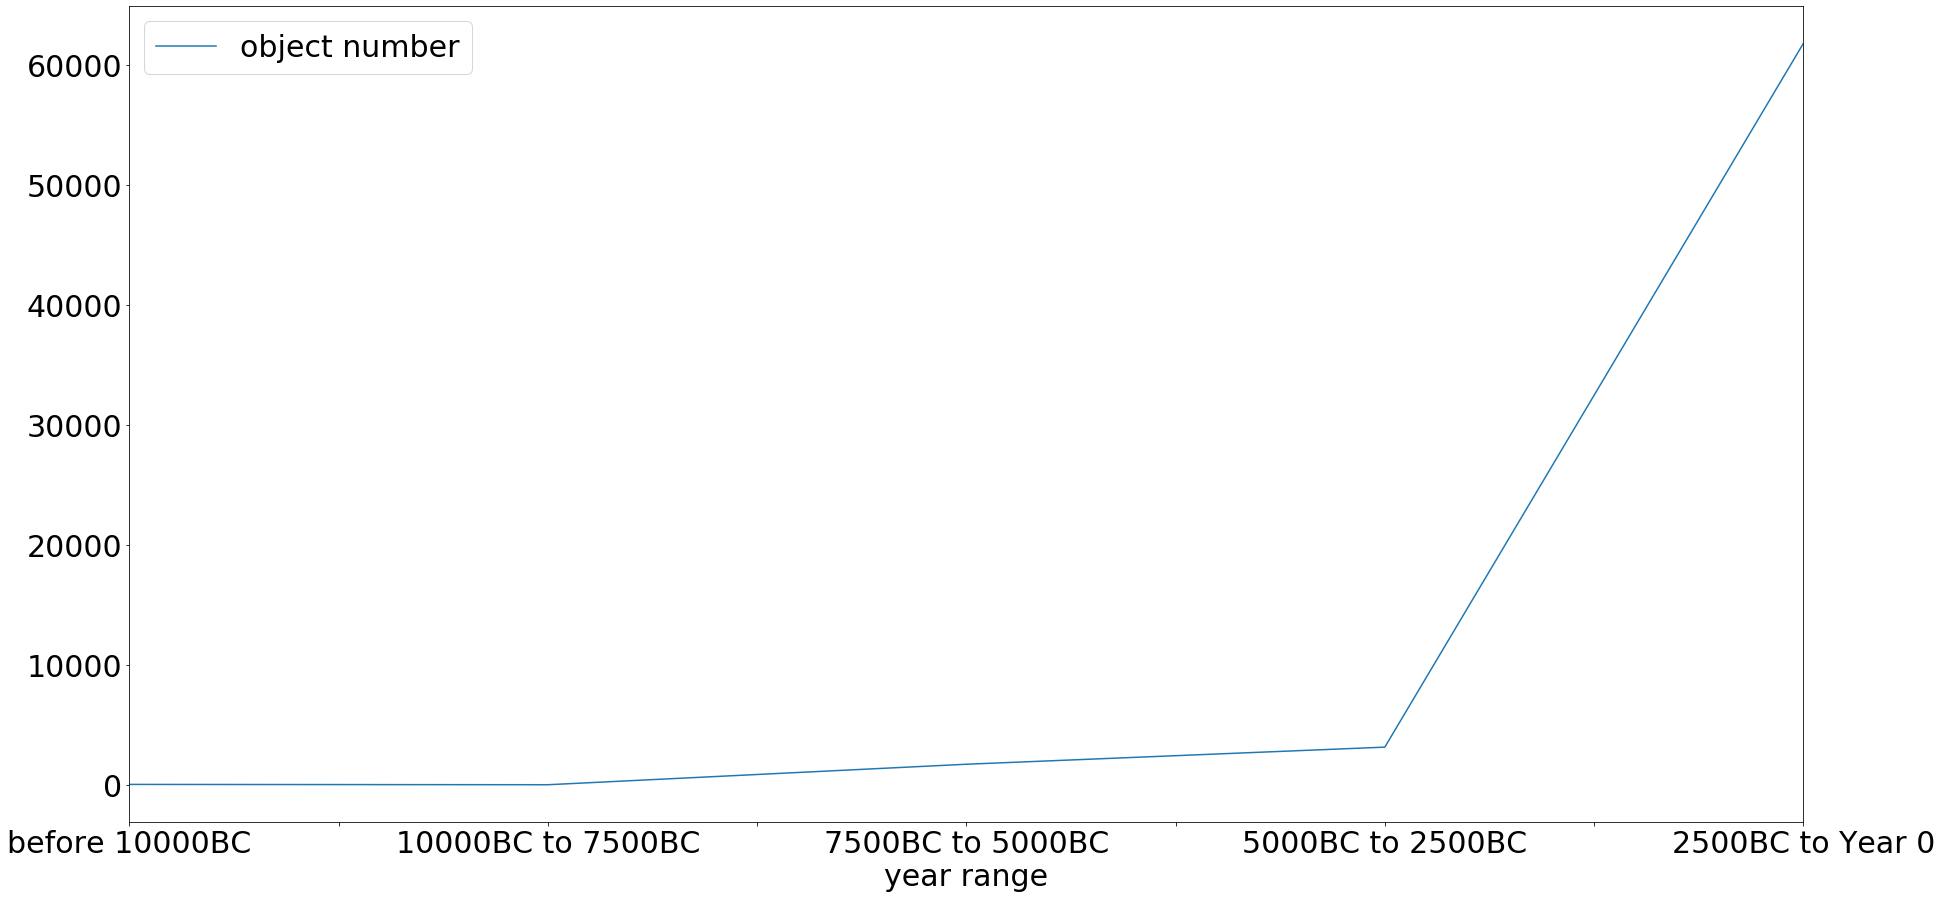

In [35]:
distribution_df.index.name = "year range"

distribution_df.plot(y="object number")

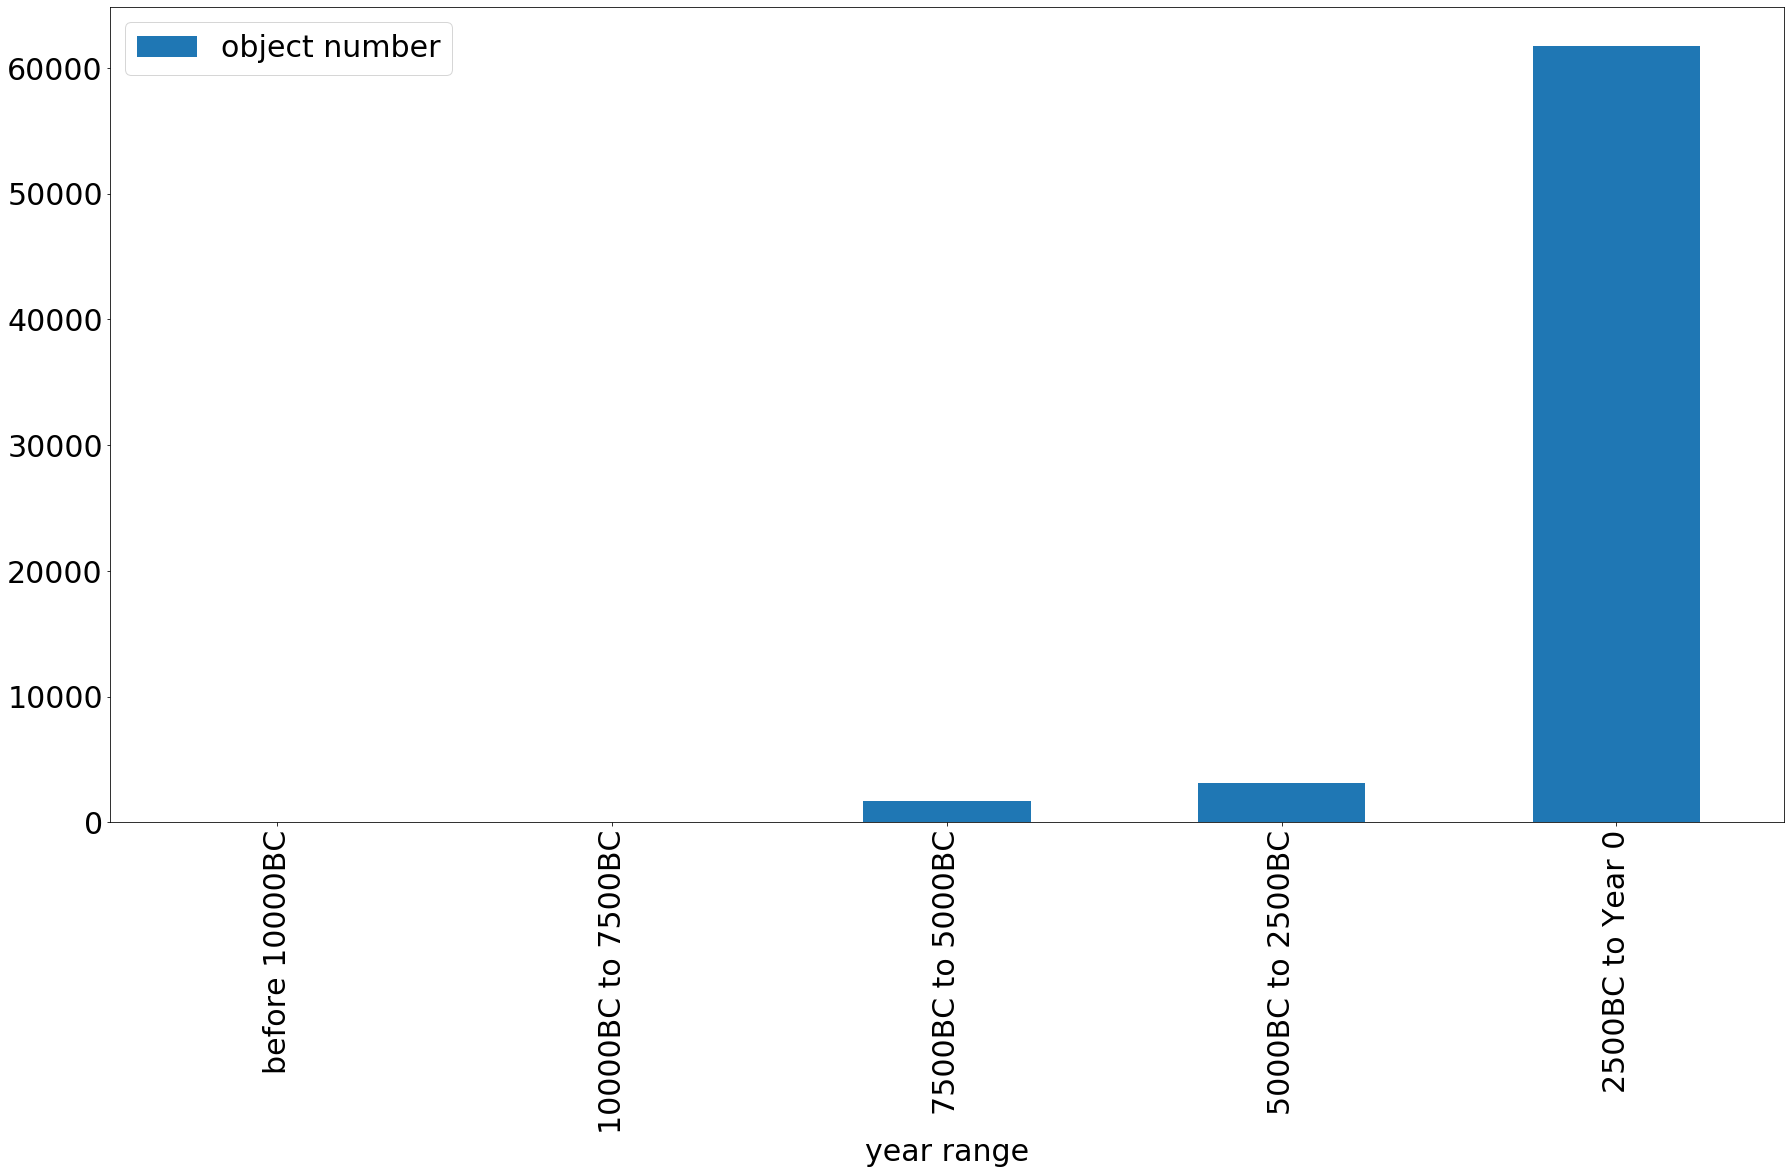

In [36]:
distribution_df.plot.bar(y="object number")

# From the above two graphs, we can see that for those objects which were created before year zero as well as collected by museums, most of them were created between 2500 BC and year Zero. 

In [37]:
object_year_after_zero_df=object_year_df[object_year_df["ObjectBeginDate"]>0]
# object_year_after_zero_df

# This is a function convert year value to century value.

In [38]:
def year_to_century(year:list) ->list:
    century = []
    for year_value in year:
        if year_value > 0:
            century_value = int(year_value/100)+1
            century.append(century_value)
        elif year_value == 0:
            century_value = 0
            century.append(century_value)
        else:
            century_value = int(year_value/100)-1
            century.append(century_value)
    return century

In [39]:
object_year_after_zero_list = object_year_after_zero_df["ObjectBeginDate"].tolist()

In [40]:
len(object_year_after_zero_list)

415316

In [41]:
object_century_after_zero_list = year_to_century(object_year_after_zero_list)
# object_century_after_zero_list

In [42]:
#Source: https://stackoverflow.com/questions/20665232/how-to-plot-the-number-of-times-each-element-is-in-a-list
counts_after_zero = Counter(object_century_after_zero_list)

In [43]:
counts_after_zero

Counter({19: 133244,
         20: 113146,
         17: 34489,
         18: 61983,
         16: 29655,
         14: 3758,
         15: 7437,
         12: 3011,
         1: 2829,
         3: 2082,
         7: 2047,
         4: 2168,
         6: 2046,
         5: 1250,
         13: 2737,
         8: 2246,
         11: 1351,
         9: 3565,
         2: 1518,
         10: 2050,
         21: 2704})

In [44]:
import collections
# Source: https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
counts_after_zero_sorted = collections.OrderedDict(sorted(counts_after_zero.items()))
counts_after_zero_sorted

OrderedDict([(1, 2829),
             (2, 1518),
             (3, 2082),
             (4, 2168),
             (5, 1250),
             (6, 2046),
             (7, 2047),
             (8, 2246),
             (9, 3565),
             (10, 2050),
             (11, 1351),
             (12, 3011),
             (13, 2737),
             (14, 3758),
             (15, 7437),
             (16, 29655),
             (17, 34489),
             (18, 61983),
             (19, 133244),
             (20, 113146),
             (21, 2704)])

In [45]:
ad_century_distribution_df = pd.DataFrame.from_dict(counts_after_zero_sorted,orient='index',
                                              columns = ["object number"])
ad_century_distribution_df.index.name = "century"

In [46]:
century_percent_list = []
for object_number_by_century in counts_after_zero_sorted.values():
    
    object_percent = object_number_by_century/415316*100
    
    century_percent_list.append(object_percent)
print(century_percent_list)

[0.6811680744300724, 0.3655048204258926, 0.5013050303865009, 0.5220121546003524, 0.30097564264319215, 0.4926369318783769, 0.4928777123924915, 0.5407930347012877, 0.8583825328183841, 0.4936000539348352, 0.3252944745687621, 0.7249901279989213, 0.6590162671315336, 0.904853172042493, 1.7906846834699361, 7.140346146067091, 8.304279151296843, 14.924298606362385, 32.082558822679594, 27.2433520500053, 0.6510705101657533]


In [47]:
ad_century_distribution_df["object_percent"]=century_percent_list

In [48]:
ad_century_distribution_df

,object number,object_percent
century,,
1,2829,0.681168
2,1518,0.365505
3,2082,0.501305
4,2168,0.522012
5,1250,0.300976
6,2046,0.492637
7,2047,0.492878
8,2246,0.540793
9,3565,0.858383


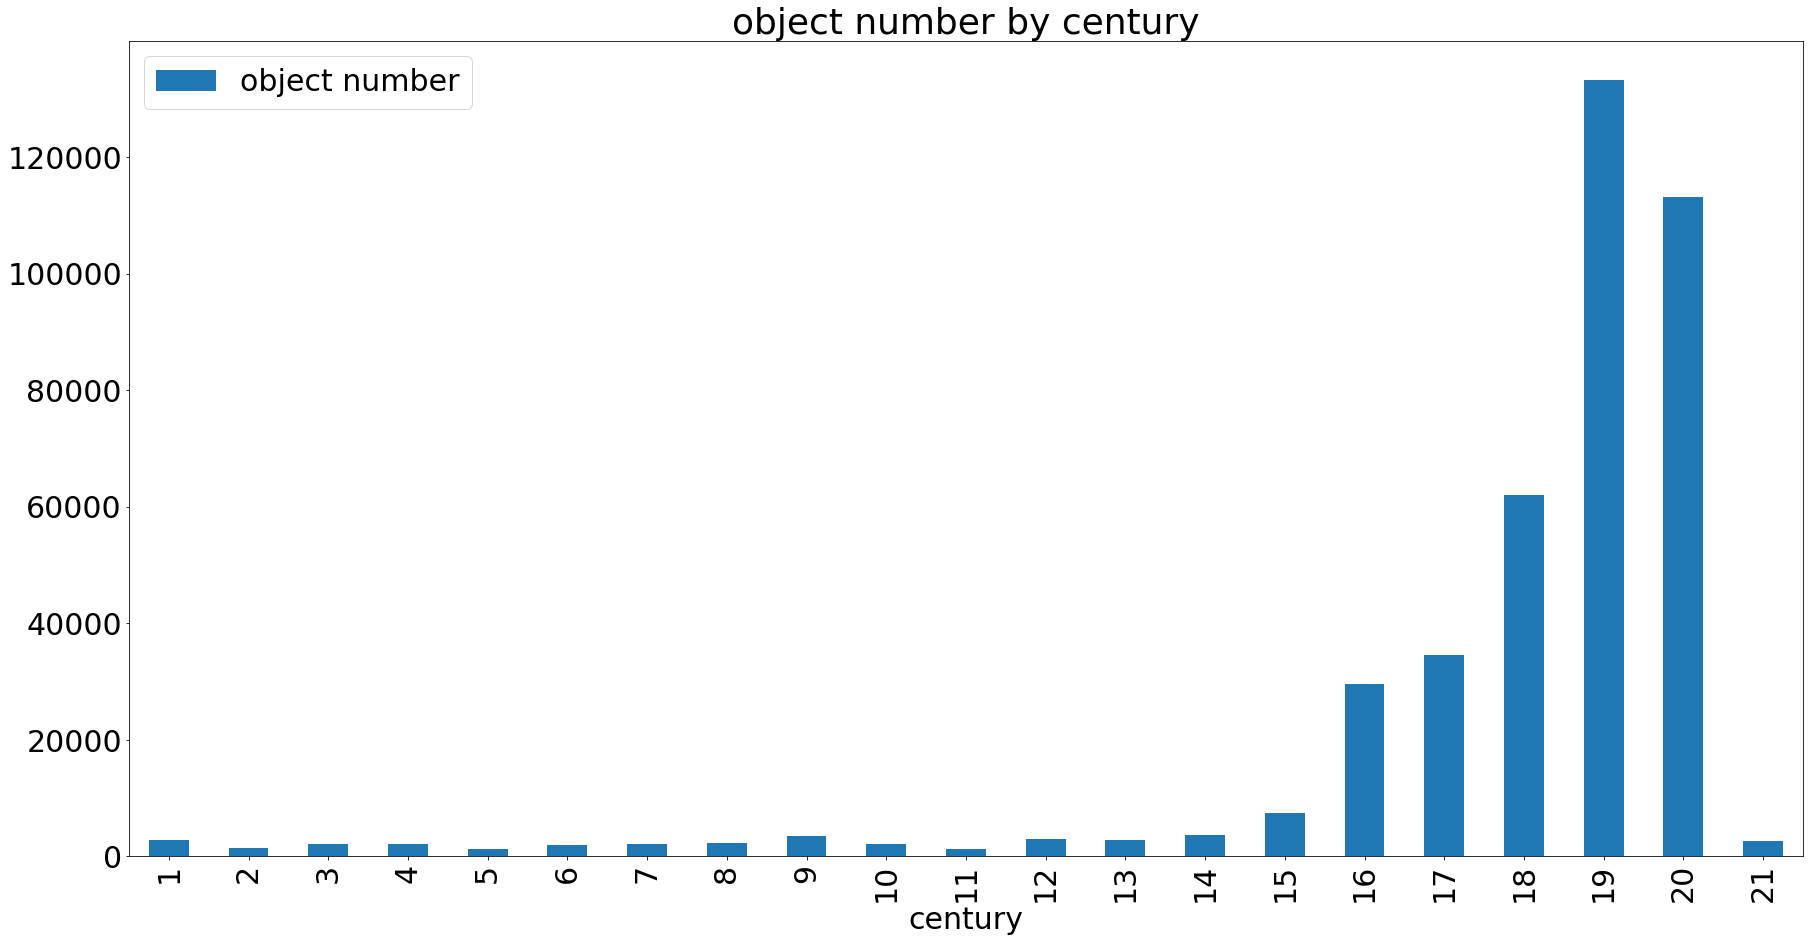

In [49]:
ad_century_distribution_df.plot.bar(y="object number",title = "object number by century")

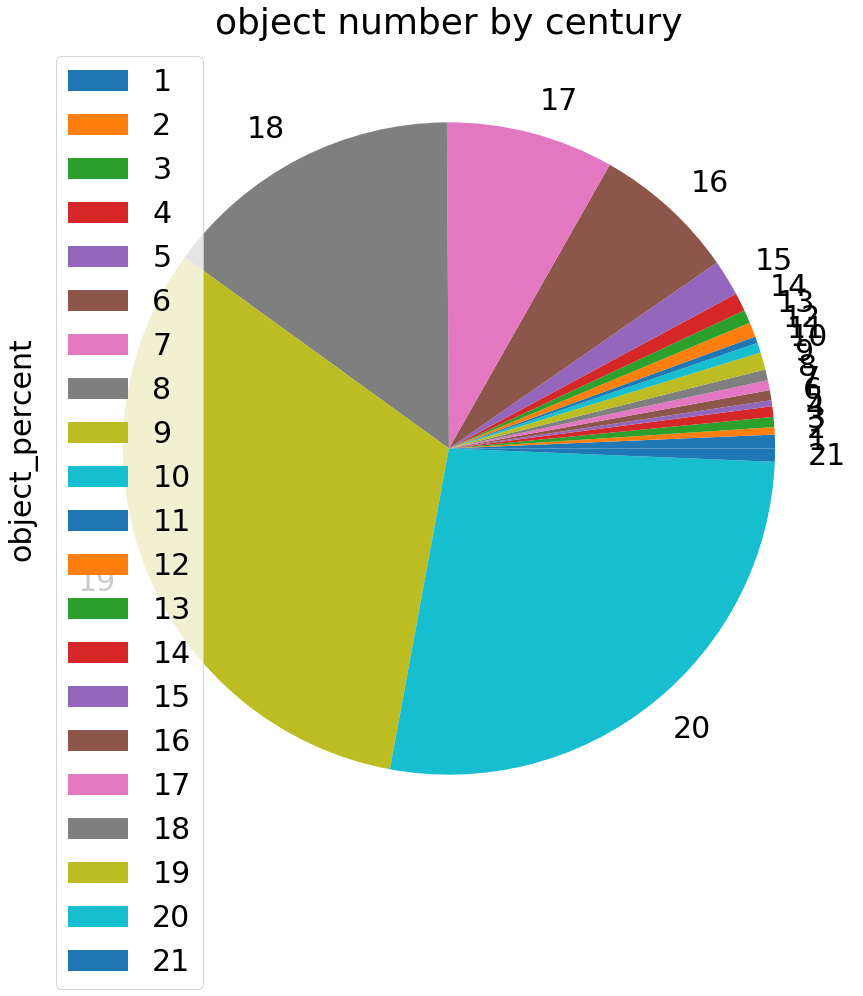

In [50]:
ad_century_distribution_df.plot.pie(y="object_percent",title = "object number by century")

# How many objects are created after (including) 19th century?¶ 

249094

In [51]:
object_year_df.head()
object_after_19century_df = object_year_df [object_year_df["ObjectBeginDate"] > 1799]
object_after_19century_df.shape

(249094, 2)

# This is a functin which convert the year to five categories:
1800-1850

1850-1900

1900-1950

1950-2000

2000-2050

In [52]:
def categorize_year_half_century (ad_year:list)->dict:
    bc_categories_dic = {"1": (1800,1850),
        "2": (1850,1900),
        "3": (1900,1950),
        "4": (1950,2000),
        "5": (2000,2050)}
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    
    half_century_category_distribution = {}
    
    for object_year in ad_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            half_century_category_distribution["1800-1850"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            half_century_category_distribution["1850-1900"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            half_century_category_distribution["1900-1950"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            half_century_category_distribution["1950-2000"] = len(d)
        
        else:
            e.append(object_year)
            half_century_category_distribution["2000-2050"] = len(e)

    return half_century_category_distribution

In [53]:
object_after_19century_list = object_after_19century_df["ObjectBeginDate"].tolist()
len(object_after_19century_list)

249094

In [54]:
categorize_year_half_century_dic = categorize_year_half_century (object_after_19century_list)

In [55]:
order = ["1850-1900","1900-1950","1950-2000","2000-2050"]
categorize_year_half_century_dic = change_key_order (order,categorize_year_half_century_dic)

In [56]:
categorize_year_half_century_df = pd.DataFrame.from_dict(categorize_year_half_century_dic,orient="index",columns=["object number"])
categorize_year_half_century_df.index.name="year category"
categorize_year_half_century_df.head()

,object number
year category,
1850-1900,77097
1900-1950,75070
1950-2000,38076
2000-2050,2704


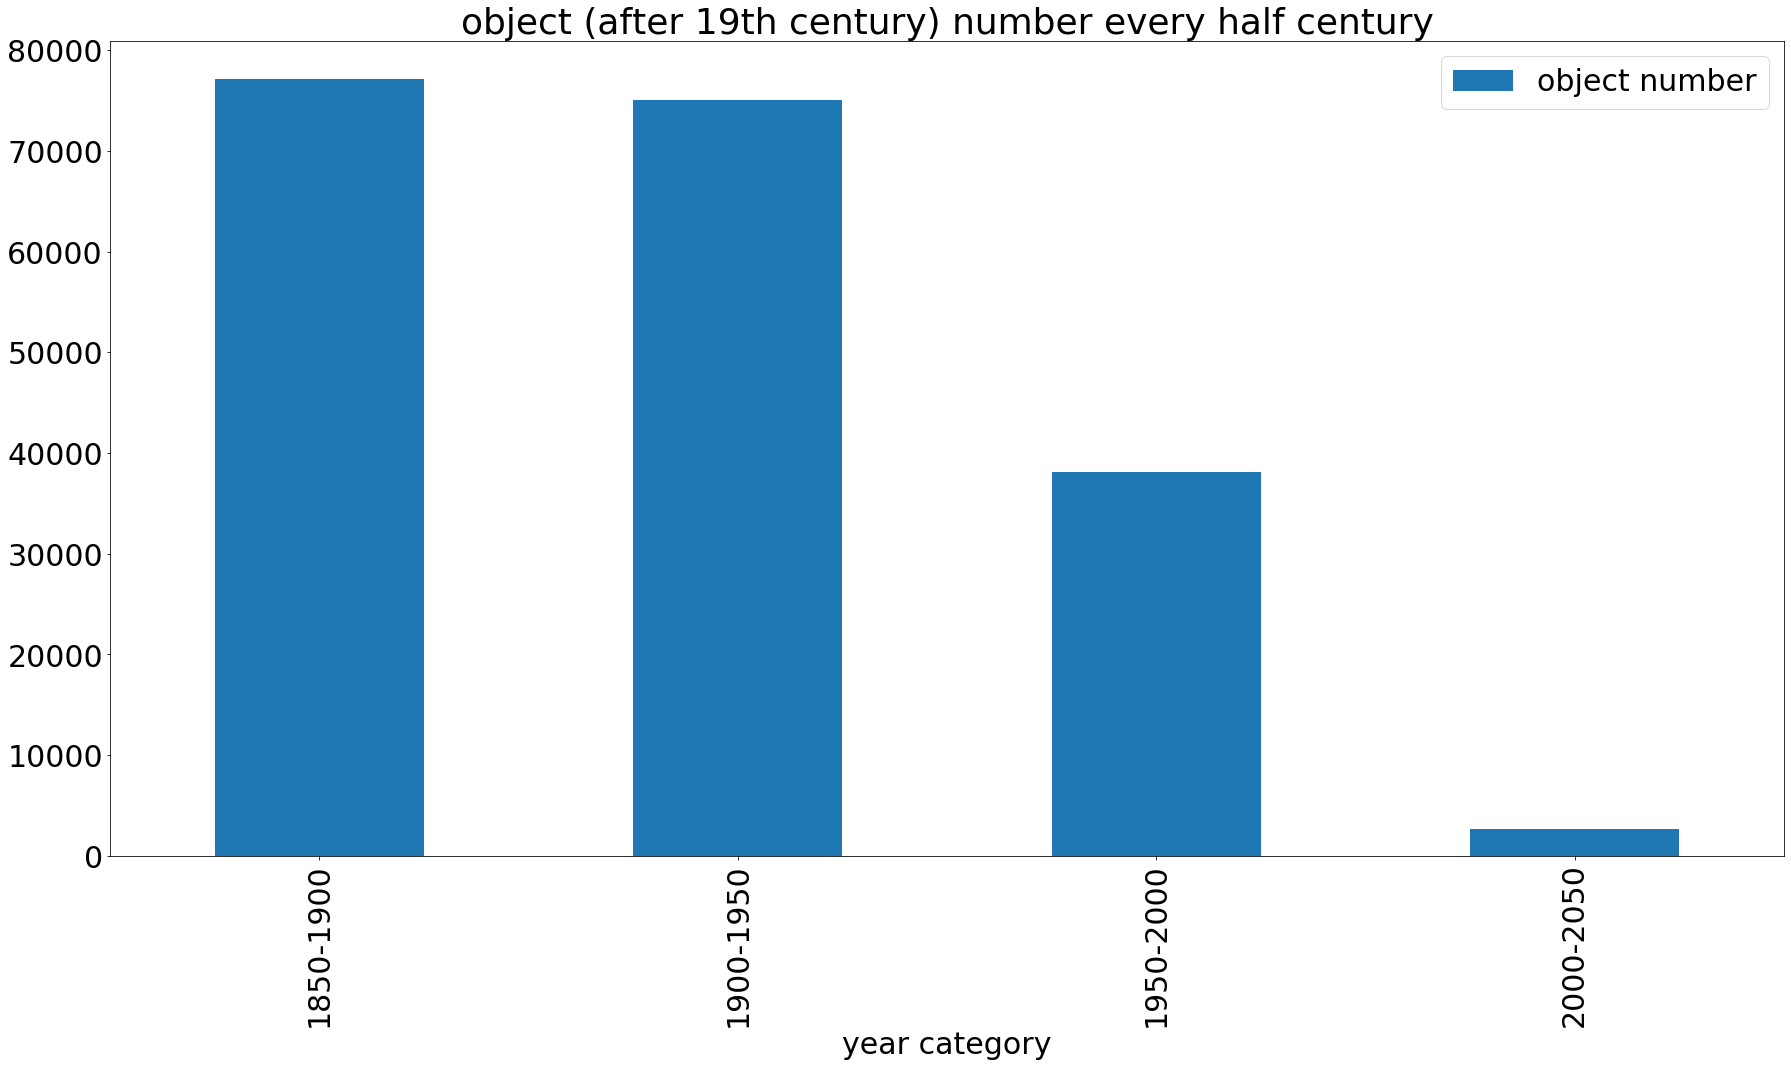

In [57]:
categorize_year_half_century_df.plot.bar(y="object number",title = "object (after 19th century) number every half century")

In [58]:
def categorize_year_qurter_century (ad_year:list)->dict:
    bc_categories_dic = {"1": (1800,1825),
        "2": (1825,1850),
        "3": (1850,1875),
        "4": (1875,1900),
        "5": (1900,1925),
        "6": (1925,1950),
        "7": (1950,1975),
        "8": (1975,2000),
        "9": (2000,2020)                 
                        }
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    f=[]
    g=[]
    h=[]
    i=[]
    
    category_distribution = {}
    
    for object_year in ad_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            category_distribution["1800-1825"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            category_distribution["1825-1850"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            category_distribution["1850-1875"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            category_distribution["1875-1900"] = len(d)
        
        elif object_year in range(bc_categories_dic["5"][0],bc_categories_dic["5"][1]):
            e.append(object_year)
            category_distribution["1900-1925"] = len(e)
            
        elif object_year in range(bc_categories_dic["6"][0],bc_categories_dic["6"][1]):
            f.append(object_year)
            category_distribution["1925-1950"] = len(f)
            
        elif object_year in range(bc_categories_dic["7"][0],bc_categories_dic["7"][1]):
            g.append(object_year)
            category_distribution["1950-1975"] = len(f)
            
        elif object_year in range(bc_categories_dic["8"][0],bc_categories_dic["8"][1]):
            h.append(object_year)
            category_distribution["1975-2000"] = len(h)
        else:
            i.append(object_year)
            category_distribution["2000-2020"] = len(i)
    return category_distribution

In [59]:
categorize_year_quarter_century_dic = categorize_year_qurter_century (object_after_19century_list)
categorize_year_quarter_century_dic

{'1850-1875': 31444,
 '1900-1925': 41839,
 '1875-1900': 45653,
 '1800-1825': 37391,
 '1825-1850': 18756,
 '1925-1950': 33231,
 '1975-2000': 12408,
 '1950-1975': 33225,
 '2000-2020': 2704}

In [60]:
key_order_qurter = ["1800-1825","1825-1850","1850-1875","1875-1900","1900-1925","1925-1950","1950-1975","1975-2000","2000-2020"]

In [61]:
categorize_year_half_century_dic = change_key_order (key_order_qurter,categorize_year_quarter_century_dic)

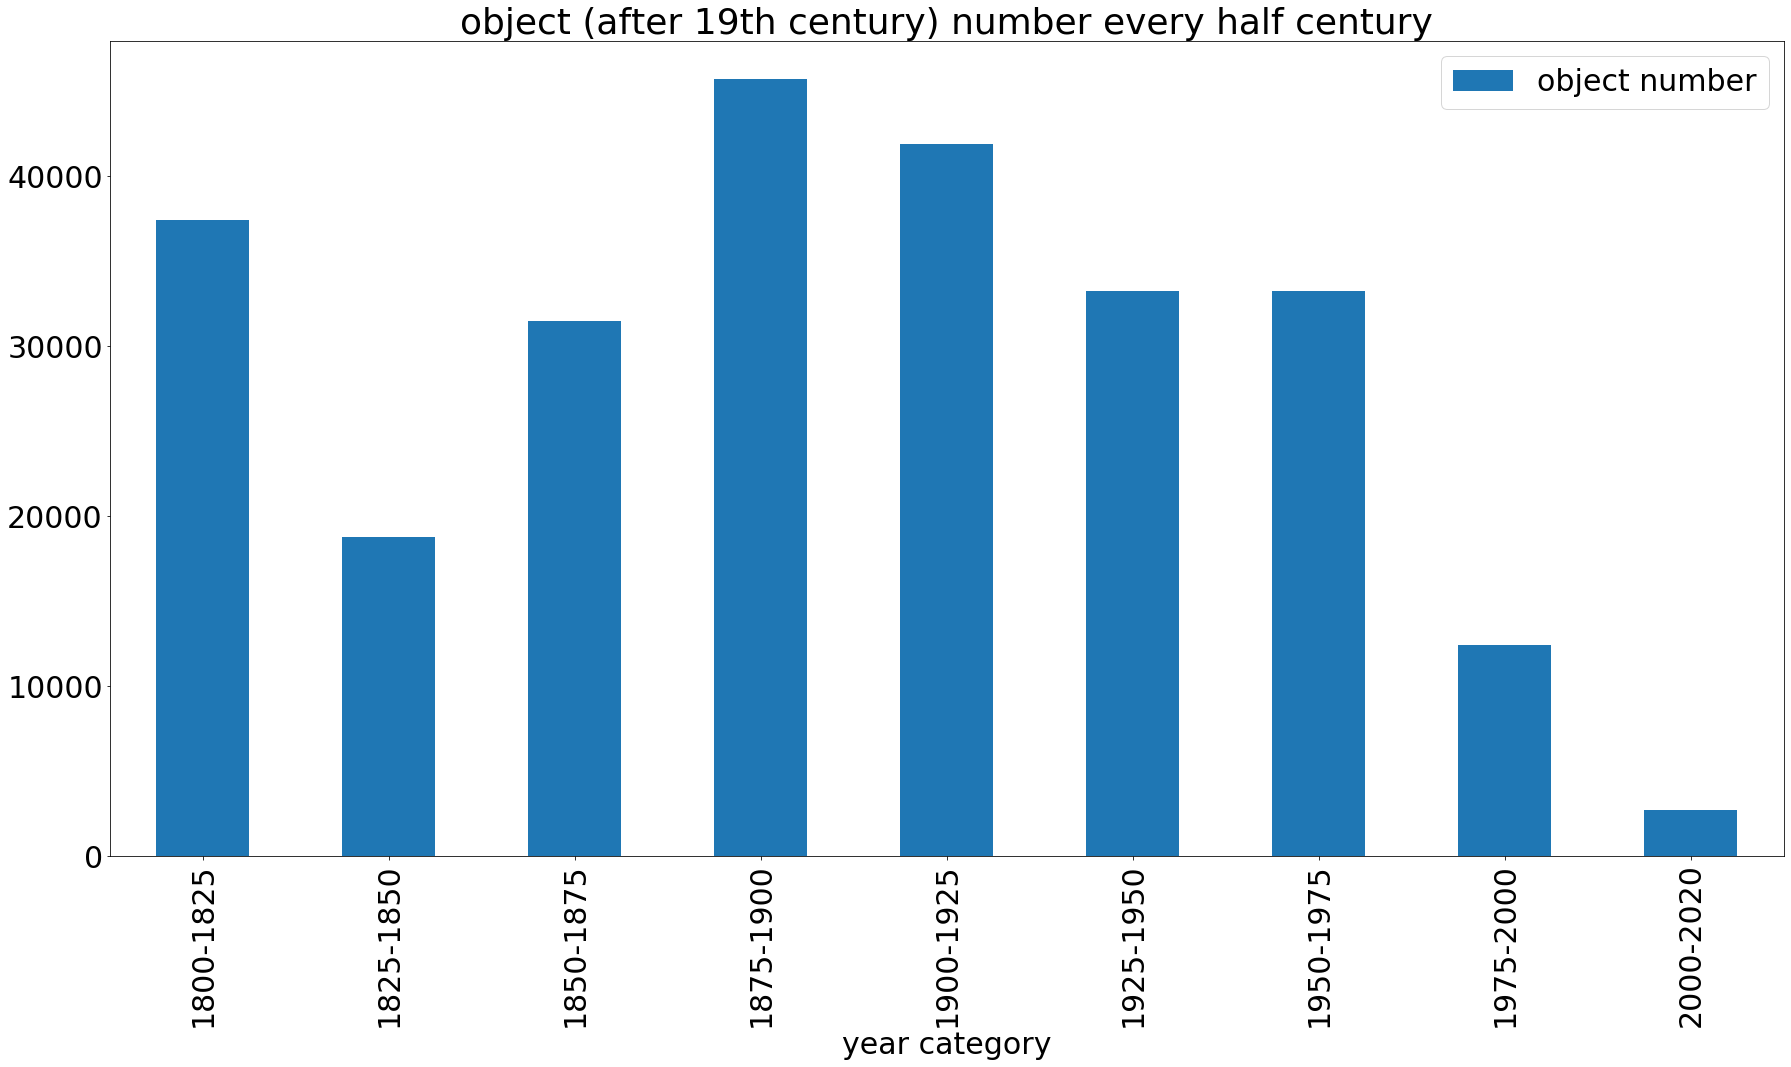

In [62]:
categorize_year_half_century_df = pd.DataFrame.from_dict(categorize_year_half_century_dic,orient="index",columns=["object number"])
categorize_year_half_century_df.index.name="year category"
categorize_year_half_century_df.plot.bar(y="object number",title = "object (after 19th century) number every half century")

In [63]:
museum_df.head()
museum_year_country = museum_df[["ObjectBeginDate","Country 1"]]
museum_year_country.shape

(485632, 2)

# Since there are many objects from Egypt. We did a year analysis on the created year values of objected originated from Egypt.¶

In [64]:
museum_year_country_drop_nan = museum_year_country.dropna(how = "any", subset=["ObjectBeginDate","Country 1"])
museum_year_country_drop_nan.head()

,ObjectBeginDate,Country 1
0,1853,N/A
1,1901,N/A
2,1909,N/A
3,1909,N/A
4,1909,N/A


In [65]:
museum_egypt_year =museum_year_country_drop_nan.loc[museum_year_country['Country 1'] == "Egypt"]
museum_egypt_year.shape

(33324, 2)

In [66]:
museum_egypt_year = museum_egypt_year.astype({"ObjectBeginDate": np.int64})
museum_egypt_year.head()

,ObjectBeginDate,Country 1
70317,1800,Egypt
70319,1900,Egypt
70320,1800,Egypt
70321,1800,Egypt
70322,1800,Egypt


In [67]:
museum_egypt_year["ObjectBeginDate"]

70317     1800
70319     1900
70320     1800
70321     1800
70322     1800
          ... 
470672   -1353
471258    -712
471259    -712
474463   -1550
474464   -1550
Name: ObjectBeginDate, Length: 33324, dtype: int64

In [68]:
egypt_year_zero_division = year_zero_division(museum_egypt_year)
egypt_year_zero_division

{'BC': 27310, 'Year Zero': 44, 'AD': 5970}

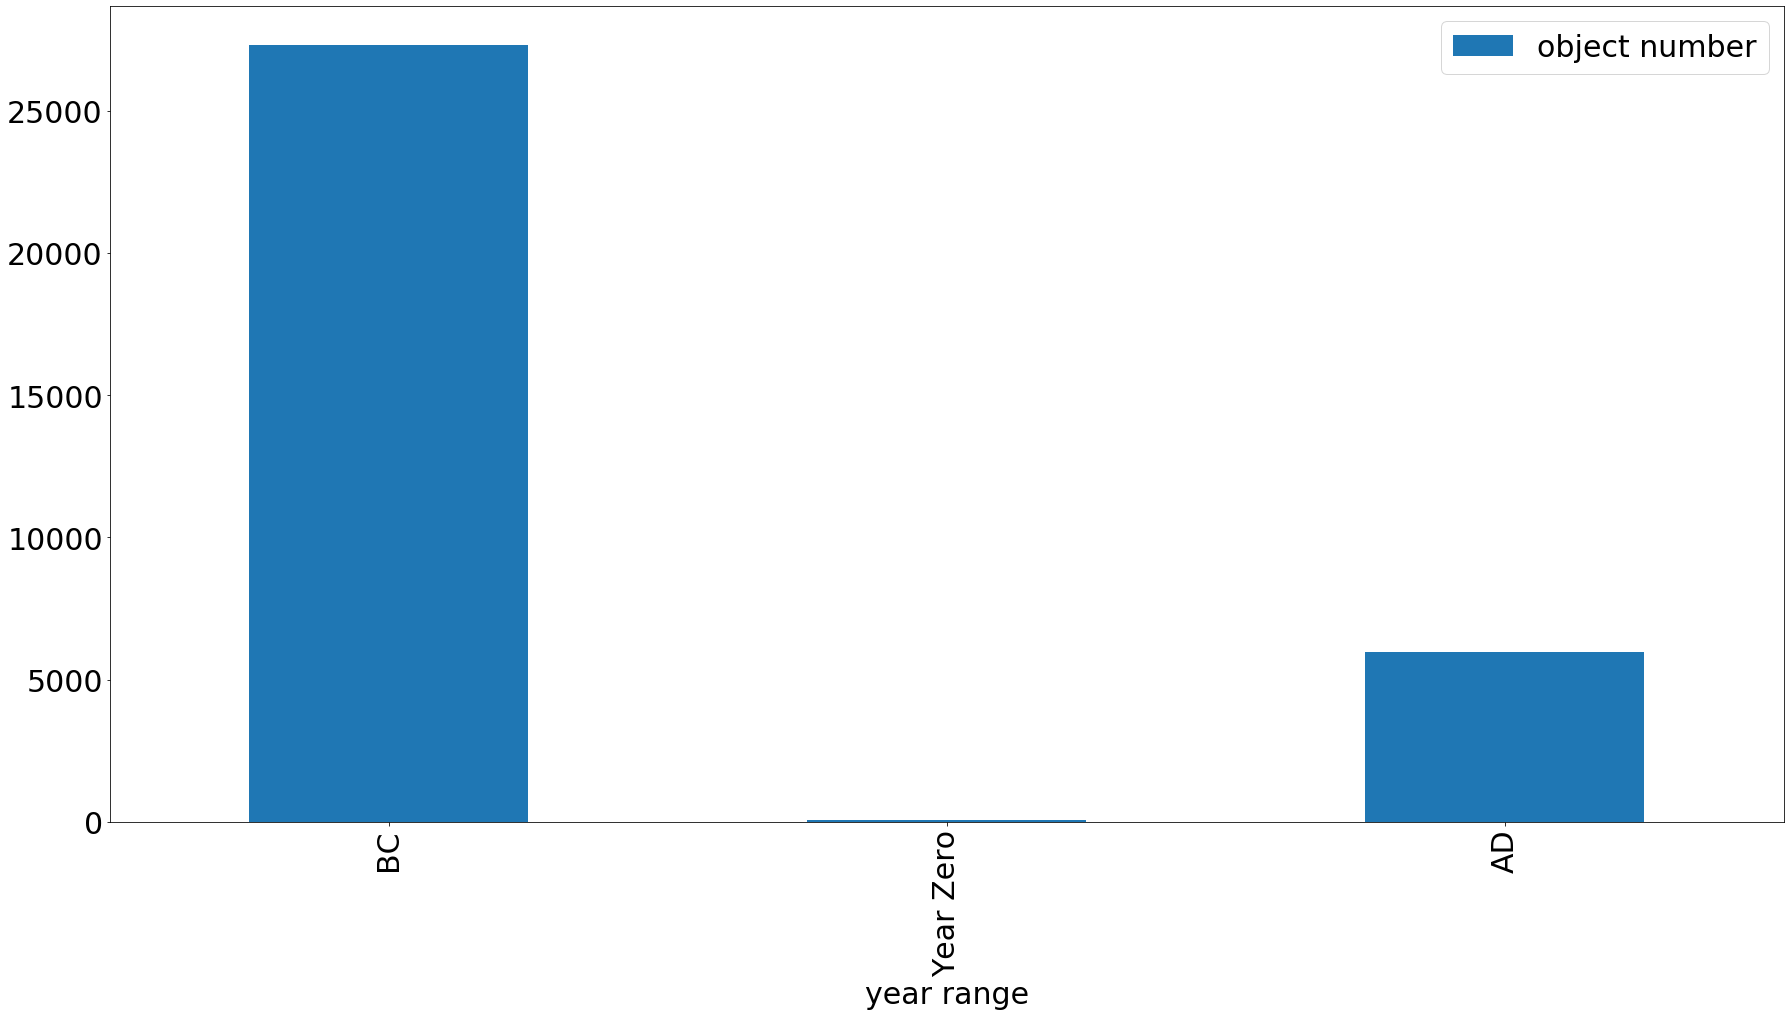

In [69]:
egypt_year_inspection_pd = pd.DataFrame.from_dict(egypt_year_zero_division,orient = "index", columns = ["object number"])
egypt_year_inspection_pd.index.name = "year range"
egypt_year_inspection_pd.plot.bar(y="object number")

In [70]:
egypt = []
for number in egypt_year_zero_division.values():
    
    object_percent = number/33324*100
    
    egypt.append(object_percent)
print(egypt)

[81.95294682511103, 0.13203697035169848, 17.91501620453727]


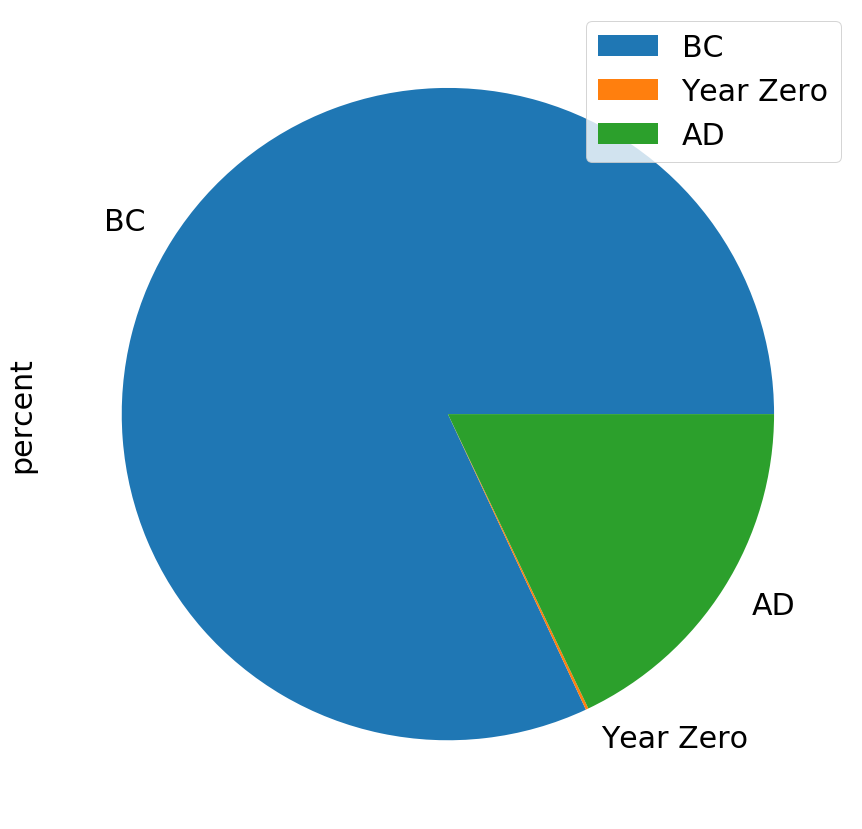

In [71]:
egypt_year_inspection_pd["percent"] = egypt
egypt_year_inspection_pd.plot.pie(y="percent")

In [72]:
museum_china_year = museum_year_country.loc[museum_year_country['Country 1'] == "China"]
museum_china_year_dropnan = museum_china_year.dropna(how = "any",subset = ["ObjectBeginDate","Country 1"])
museum_china_year_dropnan= museum_china_year_dropnan.astype({"ObjectBeginDate": np.int64})
museum_china_year_dropnan.shape

(948, 2)

In [73]:
china_year_zero_division = year_zero_division(museum_china_year_dropnan)
china_year_zero_division

{'BC': 1, 'Year Zero': 0, 'AD': 947}

In [74]:
china_year_inspection_pd = pd.DataFrame.from_dict(china_year_zero_division,orient = "index", columns = ["object number"])
china_year_inspection_pd.index.name = "year range"

In [75]:
china = []
for year in china_year_zero_division.values():
    
    object_percent = year/948*100
    
    china.append(object_percent)
print(china)

[0.10548523206751054, 0.0, 99.89451476793249]


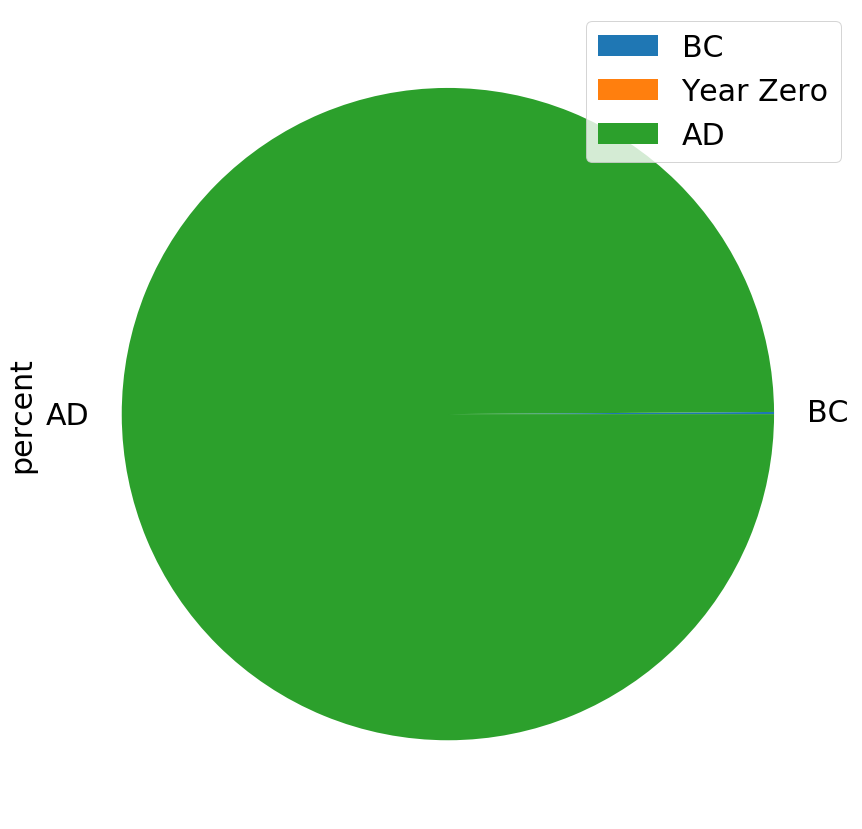

In [76]:
china_year_inspection_pd["percent"] = china
china_year_inspection_pd.plot.pie(y="percent")